# TP1: SERIES TEMPORELLES

Realised by RUDY TCHAMBA TCHAPTCHE ITIEL 21T2981

Dans le domaine de la finance je analyse l'evolution du bitcoin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definisons tout d'abord le datetimeindex pour indiqué a pandas que nous travaillons sur une base temporelles pour cela ont dire a notre colonne index sera plutot nos dates

In [2]:
bitcoin = pd.read_csv("/home/redeus/Downloads/BTC-EUR.csv", index_col='Date', parse_dates=True)

In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2014-09-17 to 2024-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3490 non-null   float64
 1   High       3490 non-null   float64
 2   Low        3490 non-null   float64
 3   Close      3490 non-null   float64
 4   Adj Close  3490 non-null   float64
 5   Volume     3490 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.9 KB


In [4]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [5]:
bitcoin.shape

(3490, 6)

### QUESTION 1

Puisque les analyse de font suivant la colunne Close on a

In [6]:
# la moyenne
np.mean(bitcoin['Close'])

13958.0491876149

In [7]:
# la variance
np.std(bitcoin["Close"])**2

235264611.66951415

In [8]:
# l'ecartype
np.std(bitcoin["Close"])

15338.33796959482

In [9]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3.490000e+03
mean,13941.489591,14260.255169,13606.508672,13958.049188,13958.049188,1.515129e+10
std,15321.841445,15680.520917,14940.434547,15340.535912,15340.535912,1.685108e+10
min,150.128998,183.047470,145.483078,151.152512,151.152512,4.640334e+06
25%,940.157318,955.831451,910.747619,941.888062,941.888062,1.886663e+08
50%,7528.849610,7678.308106,7306.367188,7537.957276,7537.957276,1.133467e+10
75%,24562.459472,24935.772949,24058.661621,24581.289063,24581.289063,2.505981e+10
max,66720.078125,67416.492188,65274.687500,66723.851563,66723.851563,2.907271e+11


### QUESTION 2

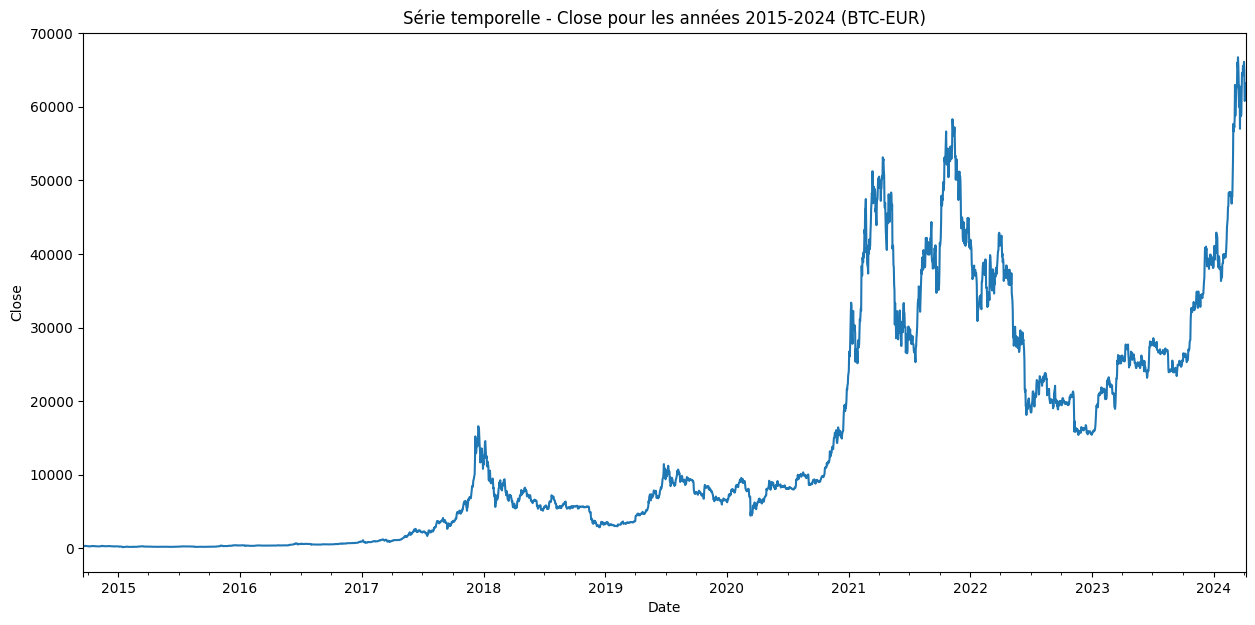

In [10]:
bitcoin['Close'].plot(figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Série temporelle - Close pour les années 2015-2024 (BTC-EUR)')
plt.show()

### QUESTION 3

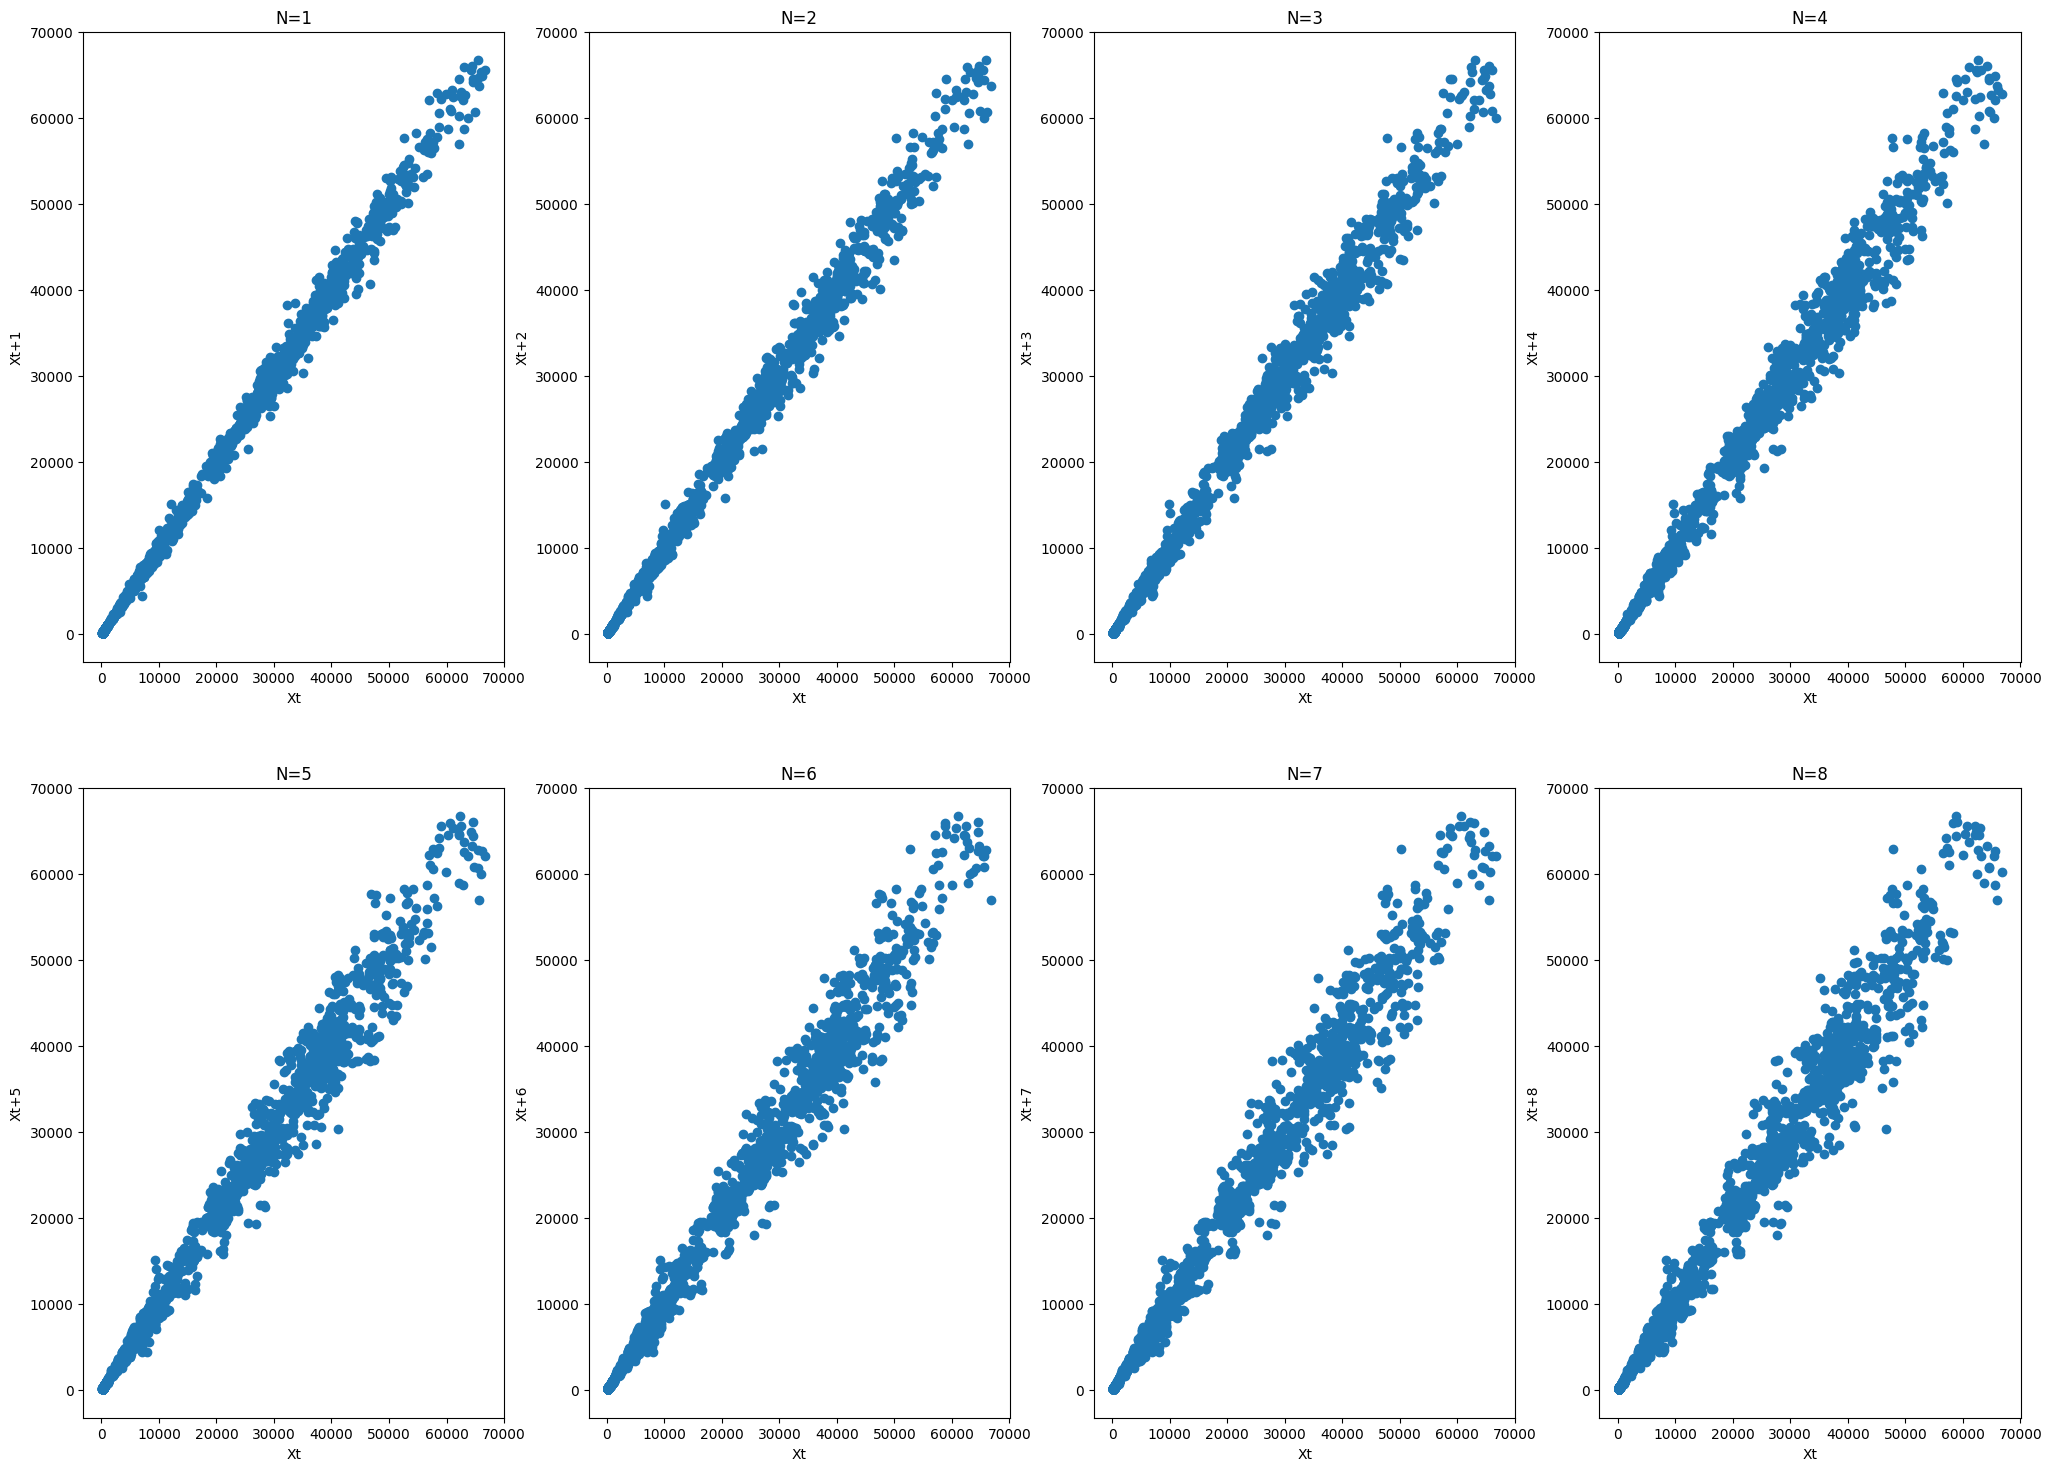

In [11]:
# REPRESENTATION DU NUAGE DE POINTS
plt.figure(figsize=[25,18])
for N in range(1,9):
    plt.subplot(2,4,N)
    debut=0
    fin=3490
    plt.scatter(bitcoin['Close'][debut:fin-N], bitcoin['Close'][debut+N:fin])
    plt.xlabel("Xt")
    plt.ylabel(f"Xt+{N}")
    plt.title(f"N={N}")
plt.show()

### QUESTION 4

In [12]:
#CALCUL DE L'AUTO-CONVARIANCE-EMPIRIQUE
def auto_cov(data, K, moy):
    debut=0
    fin=len(data)
    Xt=data[debut:fin-K]
    Xt_k=data[debut+K:fin]

    cov=0
    for i in range(fin-K):
        cov+=(Xt[i]-moy)*(Xt_k[i]-moy)
    return cov/(fin-K)

In [13]:
def auto_cor(data, K):
    moy=np.mean(data)
    cov_0=auto_cov(data, 0, moy)
    cov_K=auto_cov(data, K, moy)
    return cov_K/cov_0

In [14]:
from tqdm import tqdm
auto_cor_all=list()
data=list(bitcoin['Close'])
for i in tqdm(range(1, 51)):
    auto_cor_all.append(auto_cor(data, i))

100%|██████████| 50/50 [00:00<00:00, 339.76it/s]


<BarContainer object of 50 artists>

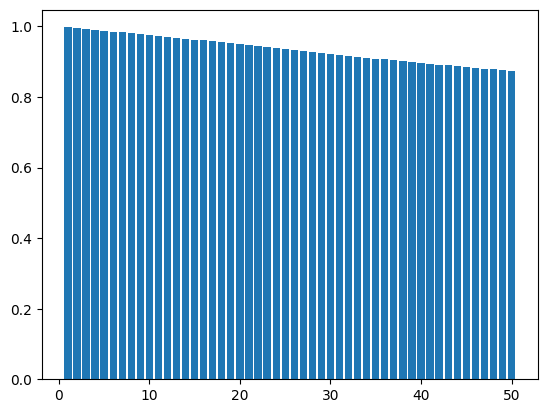

In [15]:
indexes=[i for i in range(1,51)]
plt.bar(indexes,auto_cor_all)

### QUESTION 5

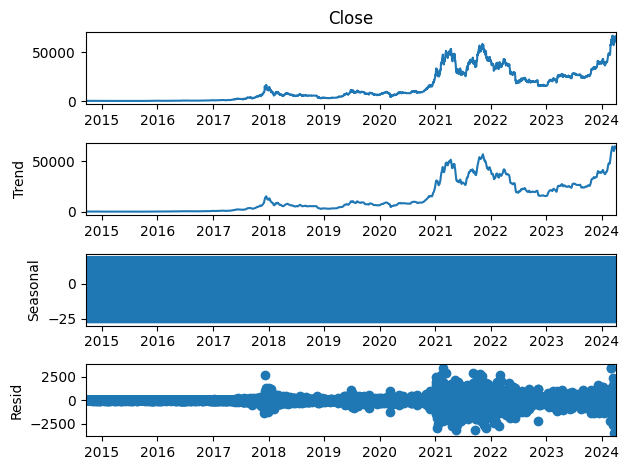

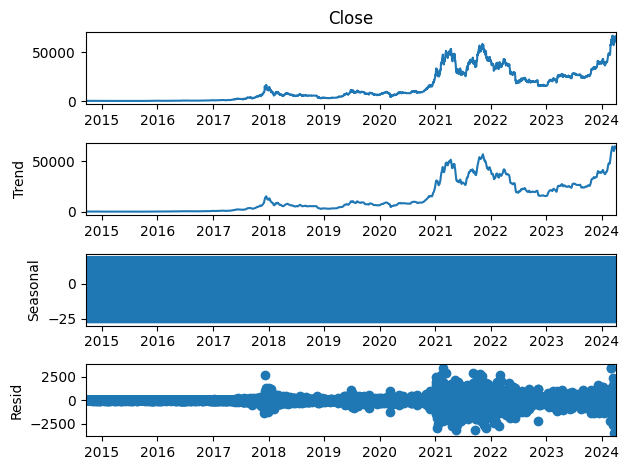

In [16]:
import statsmodels.api as sm

tsb = sm.tsa.seasonal_decompose(bitcoin['Close'])
tsb.plot()